In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [2]:
# Load the data
data_with_coords = pd.read_csv('D:/!!Research/rgee_test/GEE_LPC/point_data/env_data_wCoords.csv')
data = data_with_coords.drop(columns = ['x_lon', 'y_lat'])
# Display the first few rows of the data
data.head()

GrndTruth    bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200  \
0          0  1.381875  1.387673  1.391175  1.412846   1.450293    1.436478   
1          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   
2          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   
3          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   
4          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   

    clay_0_5  clay_5_15  clay_15_30  ...    kw_025    resdept  soil_depth  \
0  21.131218  22.248047   25.274633  ...  0.269307  71.531555  204.043747   
1  12.523438  12.517578   14.886719  ...  0.245076  56.675571  205.172592   
2  12.523438  12.517578   14.886719  ...  0.245481  59.141796  203.565475   
3  12.523438  12.517578   14.886719  ...  0.258702  58.169685  206.974319   
4  12.523438  12.517578   14.886719  ...  0.246111  56.164371  203.378952   

   wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
0               66.303207  0.001015      25.616442  420.859833  384.467072   
1               85.919785  0.000263      26.720432  418.933075  384.077240   
2               82.631371  0.000460      26.433264  418.951141  383.294006   
3               84.635284  0.000948      26.282341  419.616150  384.000000   
4               86.948471  0.000464      26.305265  418.332672  383.988769   

    dist_drain   dist_road  
0  2510.766432  296.210965  
1  4032.639783   38.345230  
2  4721.268141  227.940177  
3  2235.246120  330.755369  
4  8219.909063    9.410144  

[5 rows x 69 columns]

In [3]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('GrndTruth', axis=1)
y = data['GrndTruth']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42) #test size orginally 0.3

In [4]:
# Now you can get the indices of the rows in the original dataset
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

testing_df = data.loc[test_indices]
#print("Training set indices:", train_indices)
print("\nTesting set:")
testing_df.head()


Testing set:


GrndTruth    bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  \
2051          1  1.413421  1.413828  1.419814  1.329004   1.218125   
1529          0  1.589609  1.577473  1.530567  1.513699   1.523548   
330           0  1.501241  1.505308  1.516810  1.526426   1.500391   
455           0  1.391603  1.397505  1.415122  1.446934   1.467109   
397           0  1.461309  1.486341  1.500313  1.496673   1.493665   

      bd_100_200   clay_0_5  clay_5_15  clay_15_30  ...    kw_025    resdept  \
2051    1.262466  46.500000  48.500000   52.500000  ...  0.200794  54.121826   
1529    1.577266   3.873412   3.651219    2.998537  ...  0.164679  76.134369   
330     1.409395   2.519531   2.206055    1.445366  ...  0.184440        NaN   
455     1.568337  10.751953  11.523438   14.373295  ...  0.194624  56.765774   
397     1.528612  12.922027  12.869756   15.082846  ...  0.278558  77.585670   

      soil_depth  wind_erodibility_index    rf_025  water_storage       bio12  \
2051  166.181519              145.451691  0.017933      15.621922  394.004639   
1529  203.000000              214.592682 -0.000917      21.732990  412.968597   
330   195.998260              221.349945  0.013672      18.686047  373.136322   
455   137.604233              174.056839  0.015200      14.121880  366.870850   
397   203.002243               56.569569  0.000046      26.354708  416.642456   

           bio07    dist_drain   dist_road  
2051  384.712982   5345.479053  442.230602  
1529  383.881897  12353.601371  434.598072  
330   389.992706    557.609868  587.581703  
455   389.016632   4189.141356  303.260578  
397   380.952423   3272.625231  244.826752  

[5 rows x 69 columns]

https://www.youtube.com/watch?v=GrJP9FLV3FE

https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27 \
https://notebook.community/slundberg/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20XGBoost

In [5]:
from xgboost import XGBClassifier
stq_model = XGBClassifier(objective='binary:logistic', seed = 42)
stq_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.50384
[1]	validation_0-logloss:0.47796
[2]	validation_0-logloss:0.45613
[3]	validation_0-logloss:0.43896
[4]	validation_0-logloss:0.42652
[5]	validation_0-logloss:0.41347
[6]	validation_0-logloss:0.40543
[7]	validation_0-logloss:0.39862
[8]	validation_0-logloss:0.39590
[9]	validation_0-logloss:0.39019
[10]	validation_0-logloss:0.38874
[11]	validation_0-logloss:0.38521
[12]	validation_0-logloss:0.38419
[13]	validation_0-logloss:0.38348
[14]	validation_0-logloss:0.38555
[15]	validation_0-logloss:0.38550
[16]	validation_0-logloss:0.38273
[17]	validation_0-logloss:0.38176
[18]	validation_0-logloss:0.38346
[19]	validation_0-logloss:0.38616
[20]	validation_0-logloss:0.38982
[21]	validation_0-logloss:0.39259
[22]	validation_0-logloss:0.39379
[23]	validation_0-logloss:0.39620
[24]	validation_0-logloss:0.39663
[25]	validation_0-logloss:0.39720
[26]	validation_0-logloss:0.39841
[27]	validation_0-logloss:0.39839


C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

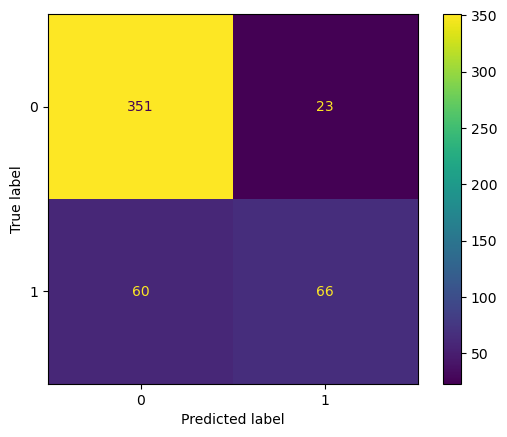

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid_1 = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}
""" # the original
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [3],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}
"""
# the new one to test
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.01, 0.001],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [2.95],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}

optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                             seed = 42,
                             subsample = 0.7,
                             colsample_bytree = 0.5),
    param_grid = param_grid_2,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

{'eta': 0.01, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 20, 'scale_pos_weight': 2.95}


C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [8]:
#compare to xgboost_env_test notebook
#https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            seed = 42, 
                            max_depth = 7, # how deep the tree will go -- originally 4
                            learning_rate = 0.1, # also known as eta
                            gamma = 1, # originally 0.25
                            reg_lambda = 20, # was set to 1
                            scale_pos_weight = 2.95, #sum(negative instances) / sum(positive instances) - was set to 5 originally
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.66846
[1]	validation_0-logloss:0.64897
[2]	validation_0-logloss:0.63187
[3]	validation_0-logloss:0.61554
[4]	validation_0-logloss:0.60012
[5]	validation_0-logloss:0.58514
[6]	validation_0-logloss:0.57477
[7]	validation_0-logloss:0.56359
[8]	validation_0-logloss:0.55273
[9]	validation_0-logloss:0.54494
[10]	validation_0-logloss:0.53342
[11]	validation_0-logloss:0.52372
[12]	validation_0-logloss:0.51746
[13]	validation_0-logloss:0.50937
[14]	validation_0-logloss:0.50372
[15]	validation_0-logloss:0.49721
[16]	validation_0-logloss:0.49223
[17]	validation_0-logloss:0.48530
[18]	validation_0-logloss:0.48039
[19]	validation_0-logloss:0.47742
[20]	validation_0-logloss:0.47217
[21]	validation_0-logloss:0.46975
[22]	validation_0-logloss:0.46695
[23]	validation_0-logloss:0.45986
[24]	validation_0-logloss:0.45761
[25]	validation_0-logloss:0.45329
[26]	validation_0-logloss:0.45073
[27]	validation_0-logloss:0.44753
[28]	validation_0-logloss:0.44725
[29]	validation_0-loglos

C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.43751
[34]	validation_0-logloss:0.43568
[35]	validation_0-logloss:0.43434
[36]	validation_0-logloss:0.43331
[37]	validation_0-logloss:0.43205
[38]	validation_0-logloss:0.43087
[39]	validation_0-logloss:0.42828
[40]	validation_0-logloss:0.42647
[41]	validation_0-logloss:0.42412
[42]	validation_0-logloss:0.42290
[43]	validation_0-logloss:0.42119
[44]	validation_0-logloss:0.42062
[45]	validation_0-logloss:0.41967
[46]	validation_0-logloss:0.41968
[47]	validation_0-logloss:0.41805
[48]	validation_0-logloss:0.41692
[49]	validation_0-logloss:0.41513
[50]	validation_0-logloss:0.41543
[51]	validation_0-logloss:0.41503
[52]	validation_0-logloss:0.41323
[53]	validation_0-logloss:0.41292
[54]	validation_0-logloss:0.41196
[55]	validation_0-logloss:0.41058
[56]	validation_0-logloss:0.40888
[57]	validation_0-logloss:0.40822
[58]	validation_0-logloss:0.40791
[59]	validation_0-logloss:0.40644
[60]	validation_0-logloss:0.40665
[61]	validation_0-logloss:0.40553
[62]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

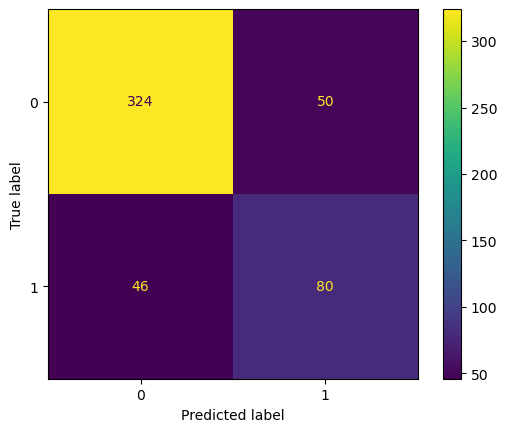

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [24]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.80%


In [25]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

### Predicting and exporting results from new data

In [11]:
# Load the data
new_data_with_coords = pd.read_csv('D:/!!Research/rgee_test/GEE_LPC/point_data/poly37_pred_pts_env_data.csv')
new_data = new_data_with_coords.drop(columns = ['x_lon', 'y_lat'])
# Display the first few rows of the data
new_data.head()

bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200  clay_0_5  \
0  1.501241  1.505308  1.516810  1.526426   1.500391    1.409395  2.519531   
1  1.501241  1.505308  1.516810  1.526426   1.500391    1.409395  2.519531   
2  1.454023  1.450686  1.434902  1.405859   1.392407    1.385269  7.863902   
3  1.452632  1.447754  1.434055  1.407576   1.401035    1.399766  8.967318   
4  1.589648  1.586507  1.574672  1.549570   1.549687    1.572344  3.681818   

   clay_5_15  clay_15_30  clay_30_60  ...    kw_025    resdept  soil_depth  \
0   2.206055    1.445366    1.307617  ...  0.182873  34.454403  151.218567   
1   2.206055    1.445366    1.307617  ...  0.175119  34.938179  151.941971   
2   8.762231   11.876585   19.569202  ...  0.162904  34.868065  151.924988   
3   9.994163   13.362035   20.567450  ...  0.190706  35.023823  152.046478   
4   3.615347    3.399414    3.059454  ...  0.184069  34.271999  151.287338   

   wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
0              196.047516  0.024947      13.631444  361.902039  391.861969   
1              213.300644  0.014460      13.480375  361.712708  391.243713   
2              225.795258  0.015538      12.351761  362.059235  391.152222   
3              164.204590  0.006416      17.160704  359.899445  393.143951   
4              189.950043  0.022949      14.129053  362.083496  391.953827   

    dist_drain   dist_road  
0  8668.914592  347.756323  
1  8180.689554  537.267497  
2  8335.288181  687.902424  
3  7393.339378  419.282668  
4  8816.492685  343.409086  

[5 rows x 68 columns]

In [12]:
new_pred = stq_model_2.predict(new_data)
#print(new_pred)
# Attach predictions to the new data
new_data_with_coords['predictions'] = new_pred

# Export the results to a new CSV file
new_data_with_coords.to_csv('D:/!!Research/rgee_test/GEE_LPC/point_data/mesq_pred_pts_env_data_results.csv', index=False)

## Finding and exporting the correctly and incorrectly testing data

In [35]:
# Make predictions on the test dataset
y_pred = stq_model_2.predict(X_test)

# Compare the predicted labels with the actual labels
correctly_predicted_indices = (y_pred == y_test)
incorrectly_predicted_indices = ~correctly_predicted_indices

# Extract rows with correct and incorrect predictions
correctly_predicted_rows = X_test[correctly_predicted_indices]
incorrectly_predicted_rows = X_test[incorrectly_predicted_indices]

# Filter original target binary classification data
original_target_correct = y_test[correctly_predicted_indices]
original_target_incorrect = y_test[incorrectly_predicted_indices]

# Concatenate original target with correctly and incorrectly predicted rows
correctly_predicted_rows_with_target = pd.concat([correctly_predicted_rows, original_target_correct], axis=1)
incorrectly_predicted_rows_with_target = pd.concat([incorrectly_predicted_rows, original_target_incorrect], axis=1)

print("Rows predicted correctly with original target:")
print(correctly_predicted_rows_with_target)

print("\nRows predicted incorrectly with original target:")
print(incorrectly_predicted_rows_with_target)

Rows predicted correctly with original target:
        bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200  \
1529  1.589609  1.577473  1.530567  1.513699   1.523548    1.577266   
330   1.501241  1.505308  1.516810  1.526426   1.500391    1.409395   
455   1.391603  1.397505  1.415122  1.446934   1.467109    1.568337   
397   1.461309  1.486341  1.500313  1.496673   1.493665    1.528612   
975   1.408537  1.402480  1.390137  1.408201   1.468146    1.440381   
...        ...       ...       ...       ...        ...         ...   
1462  1.350820  1.389238  1.404776  1.418164   1.430449    1.445503   
2312  1.453926  1.451836  1.438837  1.413934   1.413578    1.412192   
1291  1.617095  1.586973  1.547148  1.571444   1.589883    1.598769   
2345  1.406540  1.397673  1.392949  1.397871   1.427463    1.472127   
2180  1.446156  1.449551  1.454039  1.453798   1.451836    1.430918   

       clay_0_5  clay_5_15  clay_15_30  clay_30_60  ...    resdept  \
1529   3.873412   3.651219    

In [36]:
# Sort the row indices
correctly_predicted_rows_with_target_sorted = correctly_predicted_rows_with_target.sort_index()
incorrectly_predicted_rows_with_target_sorted = incorrectly_predicted_rows_with_target.sort_index()

correctly_predicted_rows_with_target_sorted.head()

bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
8   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
13  1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
14  1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
20  1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   

    clay_5_15  clay_15_30  clay_30_60  ...    resdept  soil_depth  \
1   12.517578   14.886719   20.718323  ...  56.675571  205.172592   
8   12.517578   14.886719   20.718323  ...  76.961235  203.259857   
13  12.517578   14.886719   20.718323  ...  56.852406  203.773285   
14  12.517578   14.886719   20.718323  ...  57.499866  203.197495   
20  12.517578   14.886719   20.718323  ...  56.510117  207.276459   

    wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
1                85.919785  0.000263      26.720432  418.933075  384.077240   
8                58.243359  0.000435      26.681686  420.944397  384.988312   
13               85.973389  0.000292      26.462543  418.941406  384.056030   
14               85.512657  0.000542      26.163368  422.054596  384.962921   
20               87.030045  0.000485      26.554554  422.136475  385.185944   

     dist_drain   dist_road  GrndTruth  
1   4032.639783   38.345230          0  
8   2956.243415   80.214738          0  
13  4148.638061   63.900013          0  
14  5189.771412  114.294758          0  
20  5902.665125   73.324525          0  

[5 rows x 69 columns]

In [44]:
# finding the indices of only the correctly predicted testing data from the original dataframe
correctly_predicted_indices = correctly_predicted_rows_with_target_sorted.index.tolist()
correctly_predicted = data_with_coords.loc[correctly_predicted_indices]
#correctly_predicted
# Define the file path where you want to save the CSV file
correct_pred_csv_file_path = "D:/!!Research/rgee_test/GEE_LPC/point_data/cor_pred_testing.csv"

# Export the DataFrame to a CSV file
correctly_predicted.to_csv(correct_pred_csv_file_path, index=False)

print("CSV file has been successfully saved.")

CSV file has been successfully saved.


In [45]:
# finding the indices of only the incorrectly predicted testing data from the original dataframe
incorrectly_predicted_indices = incorrectly_predicted_rows_with_target_sorted.index.tolist()
incorrectly_predicted = data_with_coords.loc[incorrectly_predicted_indices]
#incorrectly_predicted
# Define the file path where you want to save the CSV file
incorrect_pred_csv_file_path = "D:/!!Research/rgee_test/GEE_LPC/point_data/incor_pred_testing.csv"

# Export the DataFrame to a CSV file
incorrectly_predicted.to_csv(incorrect_pred_csv_file_path, index=False)

print("CSV file has been successfully saved.")

CSV file has been successfully saved.


In [14]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.3959519947201865

In [31]:
from sklearn.metrics import classification_report
import shap
# Print classification report
print(classification_report(y_test, y_pred))

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       374
           1       0.62      0.63      0.62       126

    accuracy                           0.81       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.81      0.81      0.81       500



https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 \
https://christophm.github.io/interpretable-ml-book/shap.html
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

[22:31:53] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[22:31:53] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


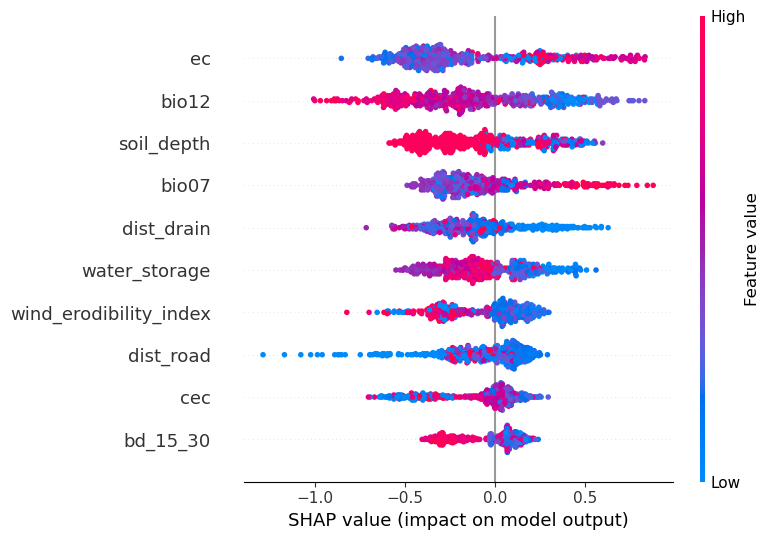

In [16]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

In [32]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(new_pred)
shap.TreeExplainer(stq_model_2).shap_values(new_pred)
shap.summary_plot(shap_values, new_pred, max_display = 10)

[16:54:47] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


ValueError: Please reshape the input data into 2-dimensional matrix.

In [57]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df_sorted = shap_df.sort_index()

X_test_sort = X_test.sort_index()
# Concatenate SHAP values DataFrame with the testing DataFrame
testing_df_with_shap = pd.concat([X_test_sort, shap_df_sorted, axis = 1])

print("Testing DataFrame with SHAP values:")
testing_df_with_shap

Testing DataFrame with SHAP values:


bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1    1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
8    1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
13   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
14   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
20   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
..        ...       ...       ...       ...        ...         ...        ...   
495  0.052800  0.008868 -0.254762 -0.137858  -0.022251   -0.019786  -0.121764   
496 -0.006497 -0.031855  0.061850  0.060667   0.009371    0.000284  -0.264233   
497 -0.066472 -0.037111  0.118673  0.053373  -0.047468    0.037348   0.098138   
498  0.027353 -0.003522 -0.307997 -0.160860  -0.025302   -0.024604  -0.096245   
499 -0.007724 -0.002386  0.066307  0.035253   0.028802   -0.002501   0.099249   

     clay_5_15  clay_15_30  clay_30_60  ...    kw_025    resdept  soil_depth  \
1    12.517578   14.886719   20.718323  ...  0.245076  56.675571  205.172592   
8    12.517578   14.886719   20.718323  ...  0.268404  76.961235  203.259857   
13   12.517578   14.886719   20.718323  ...  0.245600  56.852406  203.773285   
14   12.517578   14.886719   20.718323  ...  0.246688  57.499866  203.197495   
20   12.517578   14.886719   20.718323  ...  0.246208  56.510117  207.276459   
..         ...         ...         ...  ...       ...        ...         ...   
495  -0.045384   -0.090775    0.003352  ... -0.045344   0.087791   -0.060610   
496  -0.096133   -0.003368   -0.011160  ... -0.098275  -0.006268    0.221216   
497  -0.010317    0.001904   -0.016167  ... -0.002421  -0.018437   -0.250735   
498  -0.059026   -0.087672   -0.027363  ... -0.045627   0.088612   -0.054358   
499   0.017435    0.005140   -0.001655  ...  0.016650   0.021018    0.411846   

     wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
1                 85.919785  0.000263      26.720432  418.933075  384.077240   
8                 58.243359  0.000435      26.681686  420.944397  384.988312   
13                85.973389  0.000292      26.462543  418.941406  384.056030   
14                85.512657  0.000542      26.163368  422.054596  384.962921   
20                87.030045  0.000485      26.554554  422.136475  385.185944   
..                      ...       ...            ...         ...         ...   
495               -0.192449  0.057707      -0.010724   -0.596820   -0.156359   
496               -0.224265  0.000992       0.237116    0.263374   -0.065170   
497                0.043642  0.241138      -0.100760    0.439768   -0.228377   
498               -0.220626  0.018376       0.118229   -0.189874    0.040270   
499                0.180998 -0.005621       0.160111    0.498324    0.631199   

      dist_drain   dist_road  
1    4032.639783   38.345230  
8    2956.243415   80.214738  
13   4148.638061   63.900013  
14   5189.771412  114.294758  
20   5902.665125   73.324525  
..           ...         ...  
495    -0.091332    0.084344  
496    -0.249908   -0.082795  
497    -0.123812    0.177258  
498    -0.285749   -0.211449  
499     0.323895   -0.595175  

[1000 rows x 68 columns]

In [68]:
feature_names = X_test.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

col_name  feature_importance_vals
56            ec                 0.364119
64         bio12                 0.336103
60    soil_depth                 0.258858
65         bio07                 0.228194
66    dist_drain                 0.213388
..           ...                      ...
40   silt_60_100                 0.000000
41  silt_100_200                 0.000000
42   theta_r_0_5                 0.000000
43  theta_r_5_15                 0.000000
34   sand_60_100                 0.000000

[68 rows x 2 columns]

In [55]:
x_test_index = X_test.index.tolist()
coords = data_with_coords.loc[x_test_index]
coords = coords[['x_lon', 'y_lat']].copy()
testing_df_shap_and_coords = pd.concat([testing_df_with_shap, coords], axis=1)
testing_df_shap_and_coords

bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1    1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
8    1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
13   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
14   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
20   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
..        ...       ...       ...       ...        ...         ...        ...   
495       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
496       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
497       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
498       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
499       NaN       NaN       NaN       NaN        NaN         NaN        NaN   

     clay_5_15  clay_15_30  clay_30_60  ...  soil_depth  \
1    12.517578   14.886719   20.718323  ...   -0.225564   
8    12.517578   14.886719   20.718323  ...   -0.314183   
13   12.517578   14.886719   20.718323  ...   -0.242654   
14   12.517578   14.886719   20.718323  ...   -0.096531   
20   12.517578   14.886719   20.718323  ...   -0.417779   
..         ...         ...         ...  ...         ...   
495        NaN         NaN         NaN  ...   -0.060610   
496        NaN         NaN         NaN  ...    0.221216   
497        NaN         NaN         NaN  ...   -0.250735   
498        NaN         NaN         NaN  ...   -0.054358   
499        NaN         NaN         NaN  ...    0.411846   

     wind_erodibility_index    rf_025  water_storage     bio12     bio07  \
1                 -0.200445  0.185718      -0.203341 -0.171464 -0.238725   
8                 -0.158150  0.169542      -0.201416 -0.412158 -0.128007   
13                -0.309241 -0.083485       0.006850 -0.505040 -0.052800   
14                -0.003306 -0.034843       0.011592  0.216806 -0.200886   
20                -0.302947 -0.005014      -0.184486 -0.384405 -0.254578   
..                      ...       ...            ...       ...       ...   
495               -0.192449  0.057707      -0.010724 -0.596820 -0.156359   
496               -0.224265  0.000992       0.237116  0.263374 -0.065170   
497                0.043642  0.241138      -0.100760  0.439768 -0.228377   
498               -0.220626  0.018376       0.118229 -0.189874  0.040270   
499                0.180998 -0.005621       0.160111  0.498324  0.631199   

     dist_drain  dist_road        x_lon        y_lat  
1     -0.220250  -0.027103  681524.7835  3802226.074  
8      0.033681  -0.308357  685280.4210  3802517.758  
13    -0.378369  -0.191058  681482.0643  3802383.845  
14     0.113081  -0.102973  686828.7964  3805987.986  
20    -0.272034  -0.001755  687704.3474  3806799.329  
..          ...        ...          ...          ...  
495   -0.091332   0.084344          NaN          NaN  
496   -0.249908  -0.082795          NaN          NaN  
497   -0.123812   0.177258          NaN          NaN  
498   -0.285749  -0.211449          NaN          NaN  
499    0.323895  -0.595175          NaN          NaN  

[910 rows x 138 columns]

### If want to export shap values then need to figure this out

In [58]:
# Define the file path where you want to save the CSV file
csv_file_path = "D:/!!Research/rgee_test/GEE_LPC/point_data/testing_results/testing_data_with_shap.csv"

# Export the DataFrame to a CSV file
testing_df_with_shap.to_csv(csv_file_path, index=False)

print("CSV file has been successfully saved.")

CSV file has been successfully saved.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


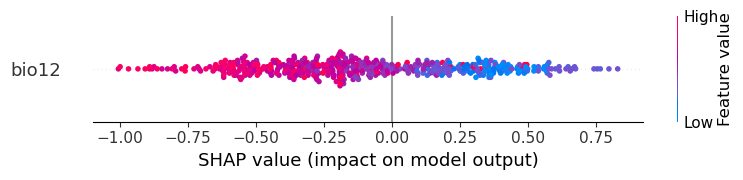

In [17]:
shap.summary_plot(shap_values[:,64:65], X_test.iloc[:, 64:65])

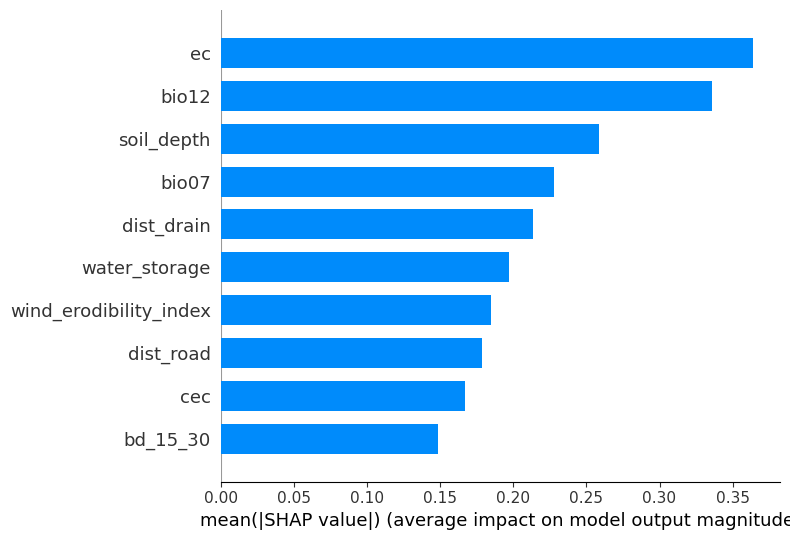

In [18]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10)

In [19]:
shap.initjs()

In [20]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [21]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

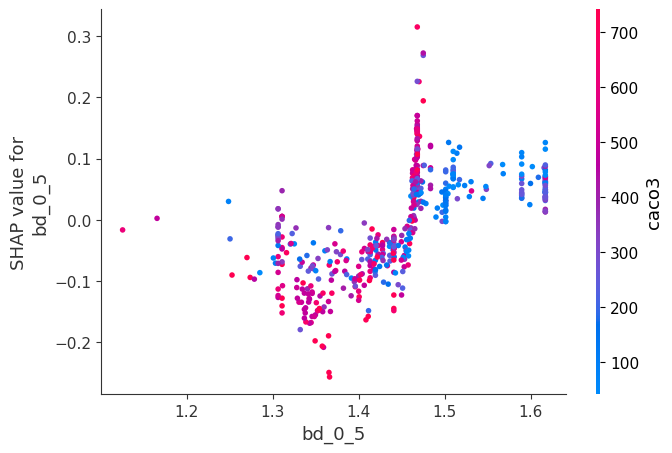

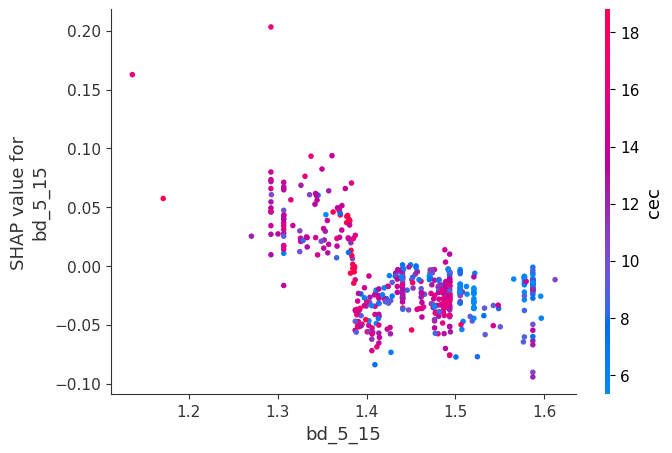

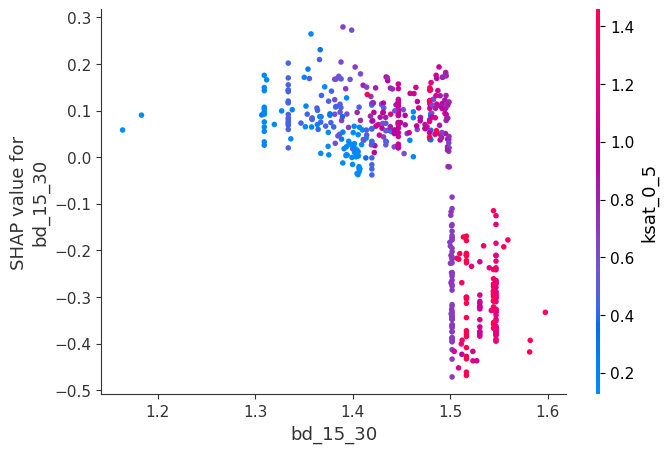

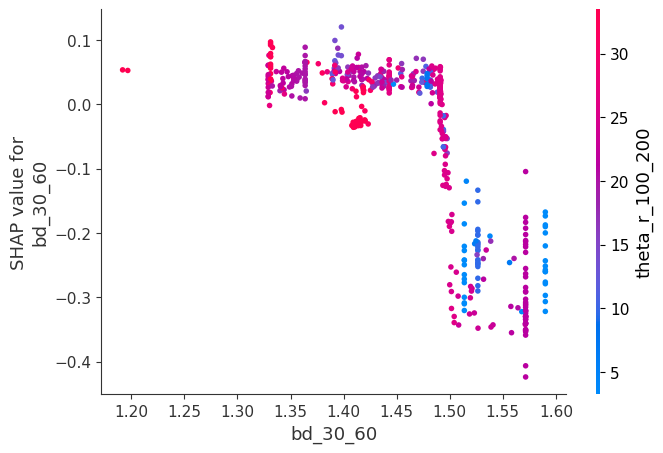

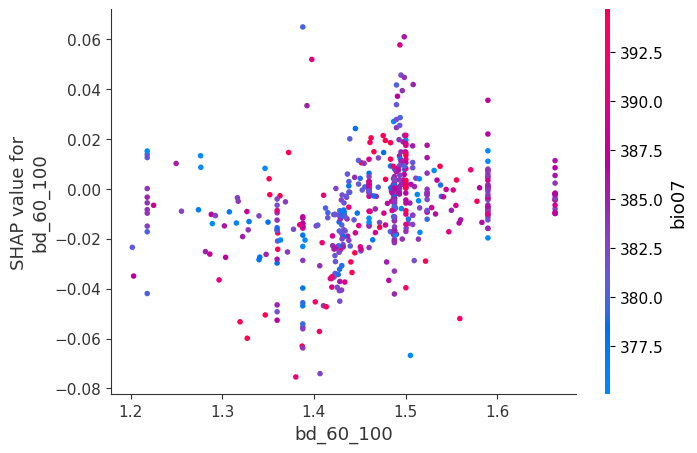

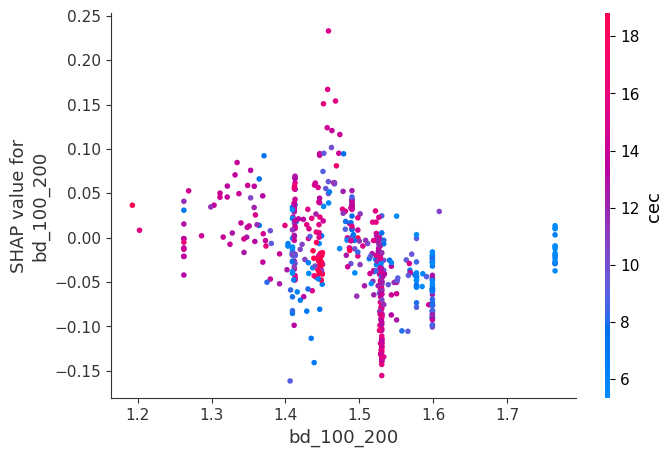

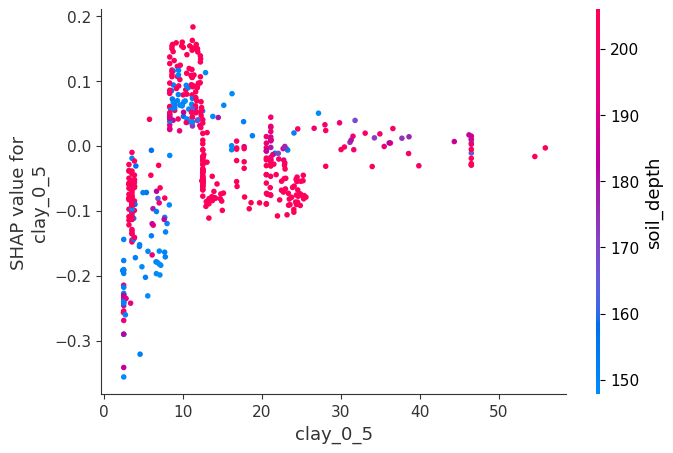

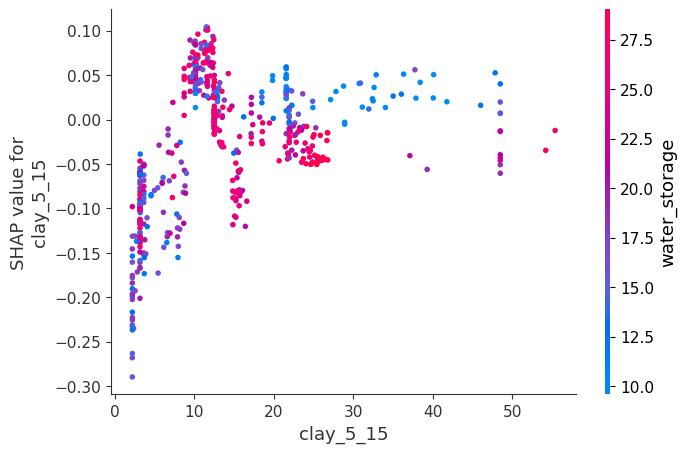

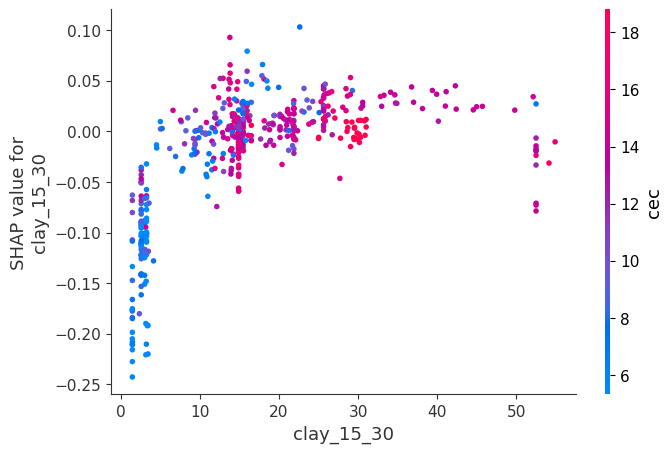

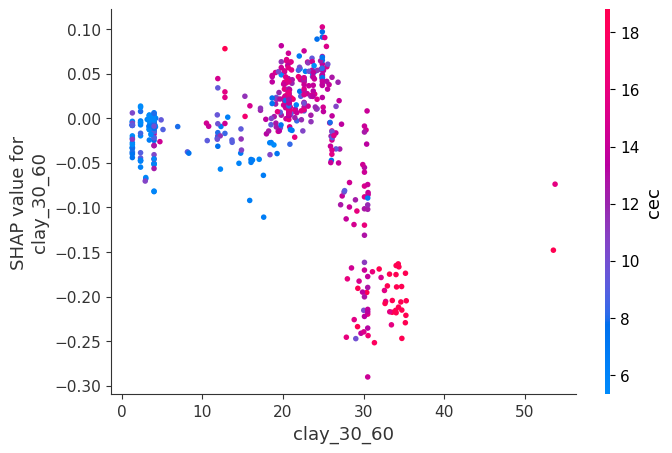

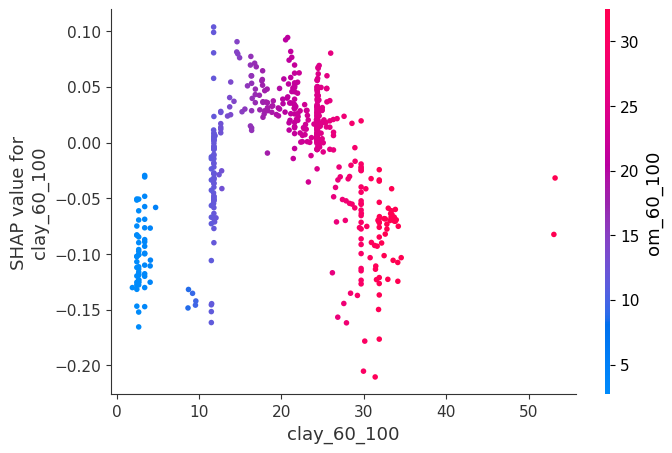

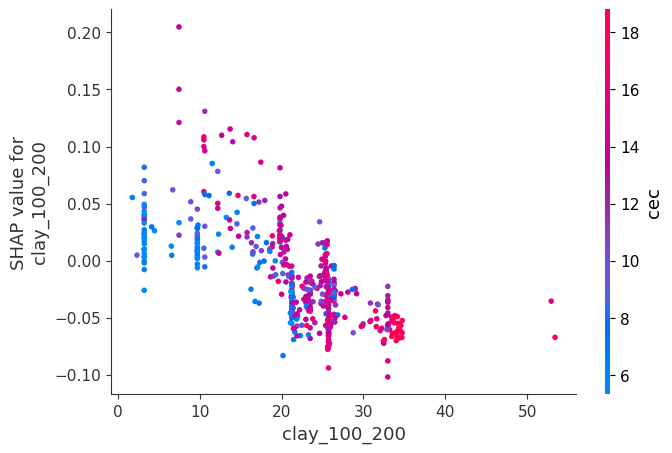

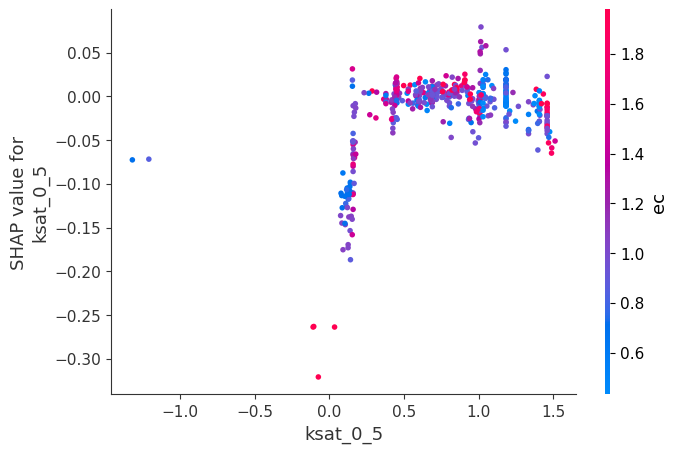

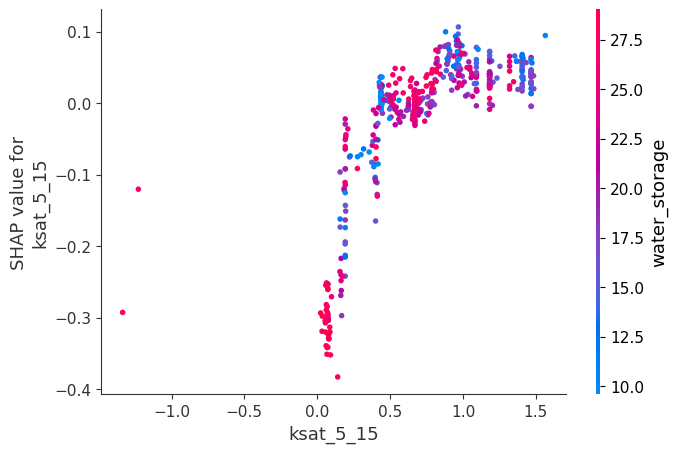

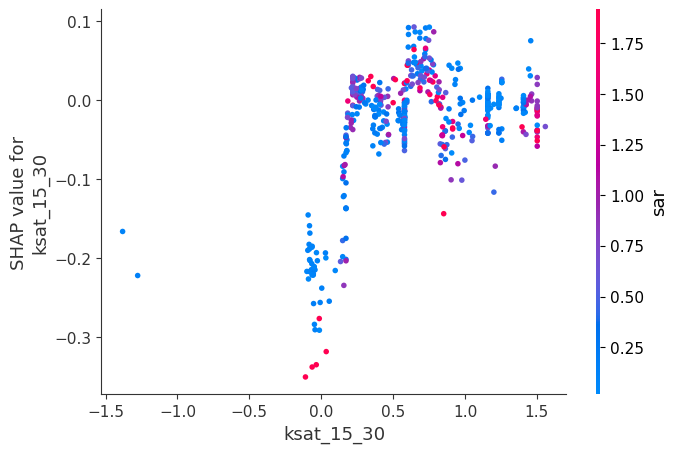

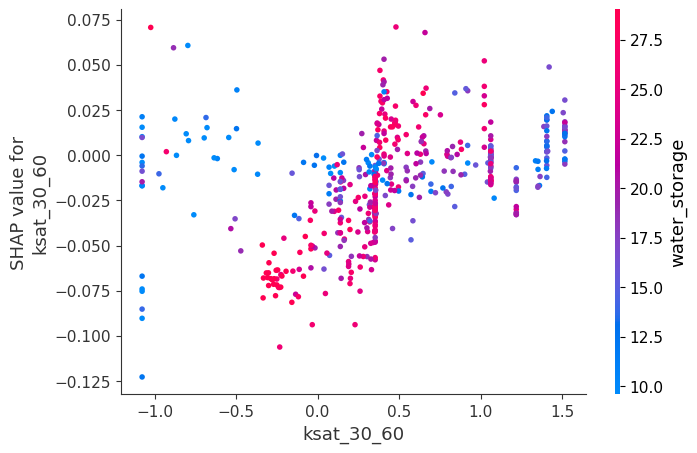

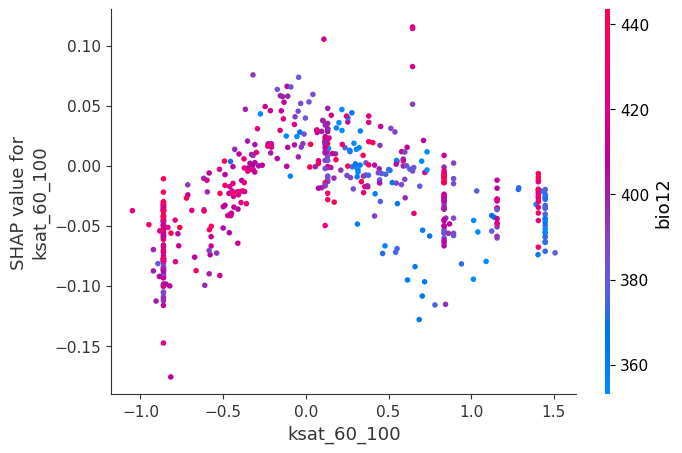

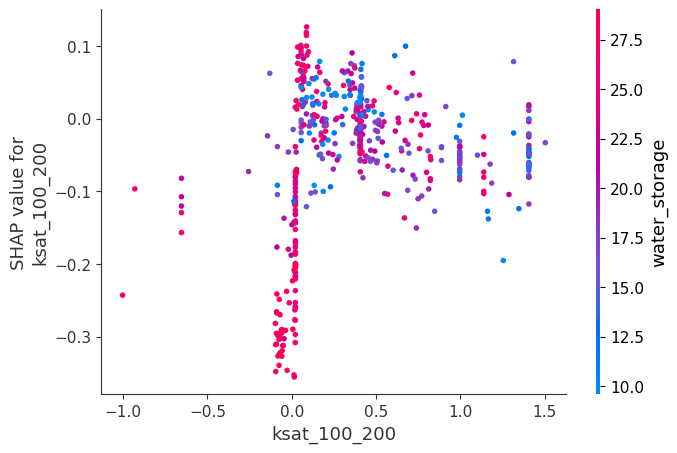

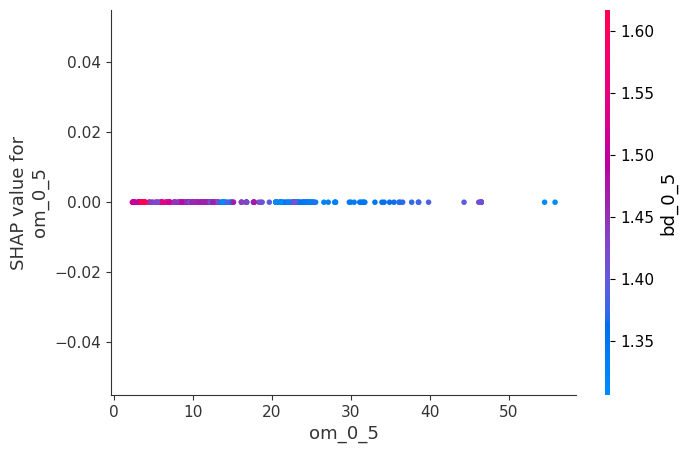

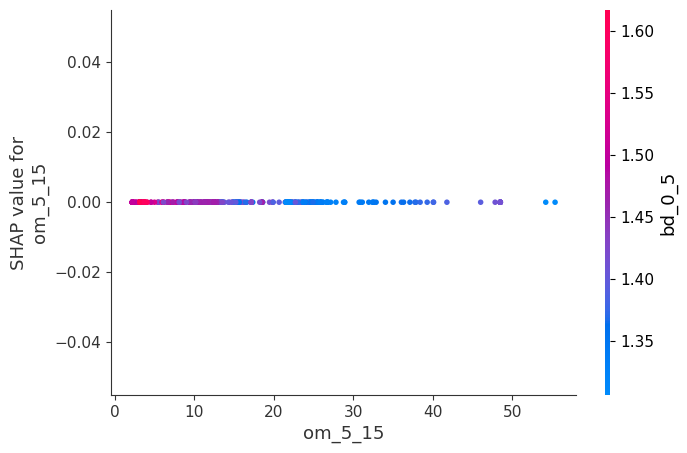

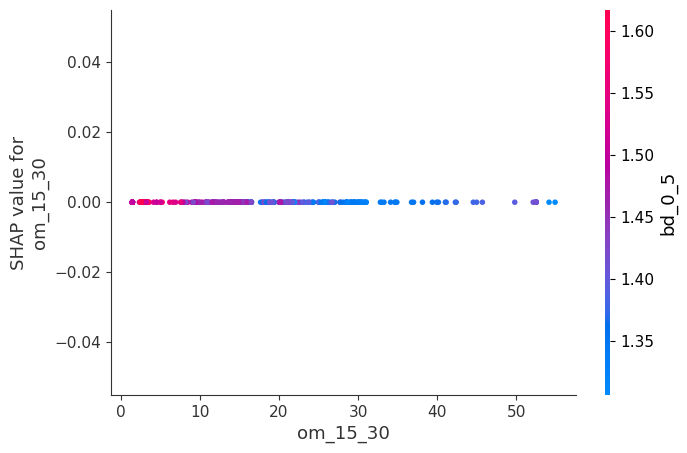

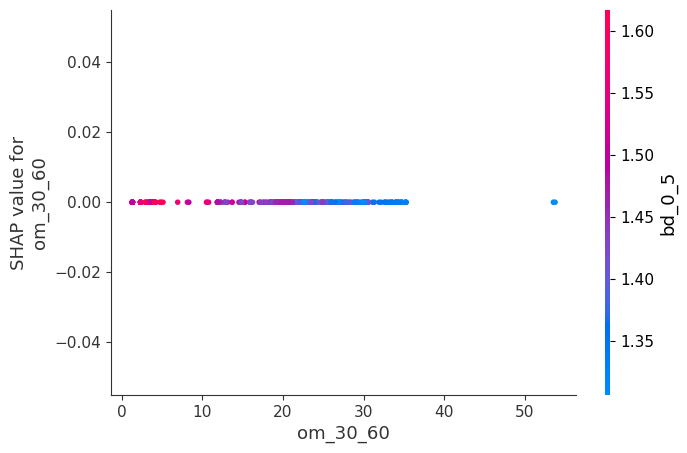

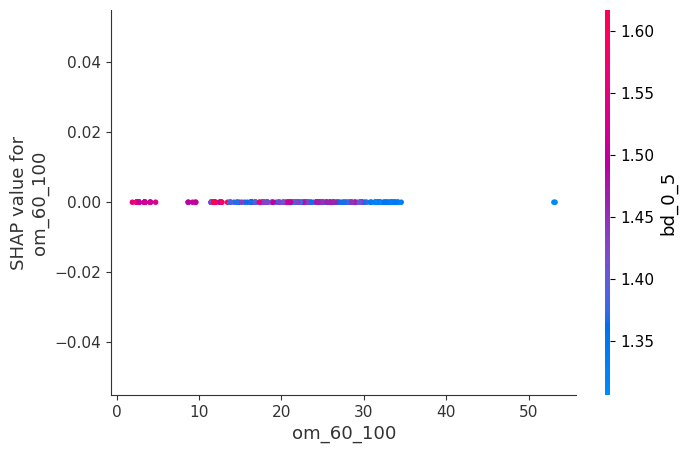

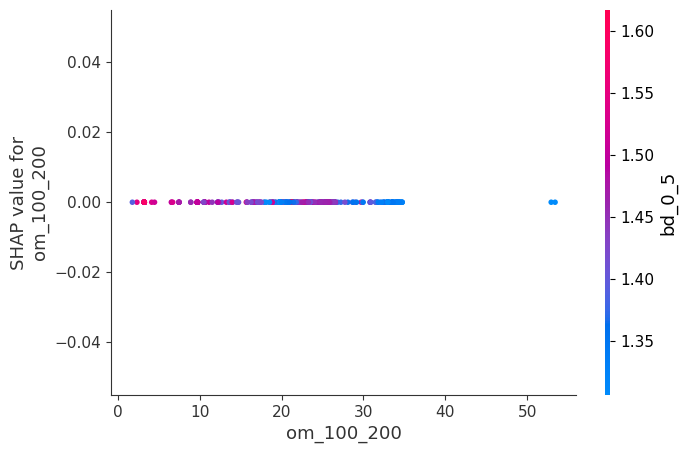

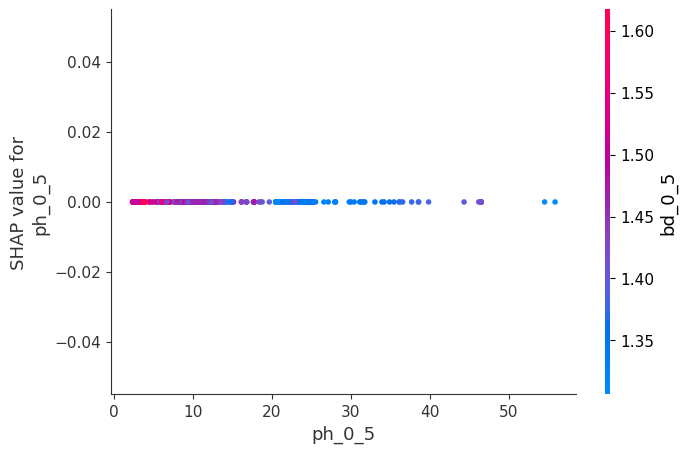

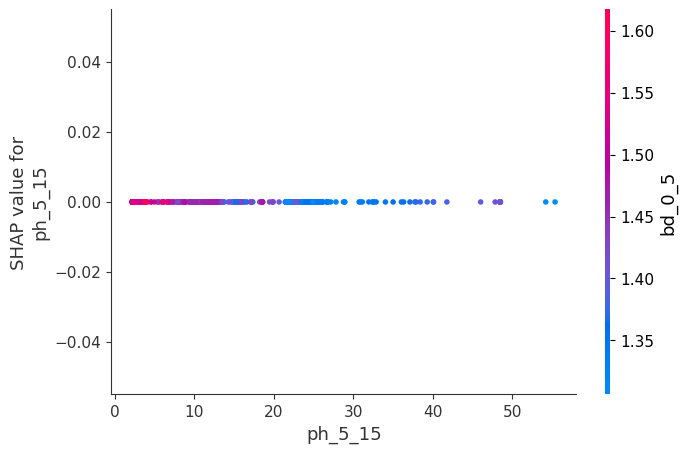

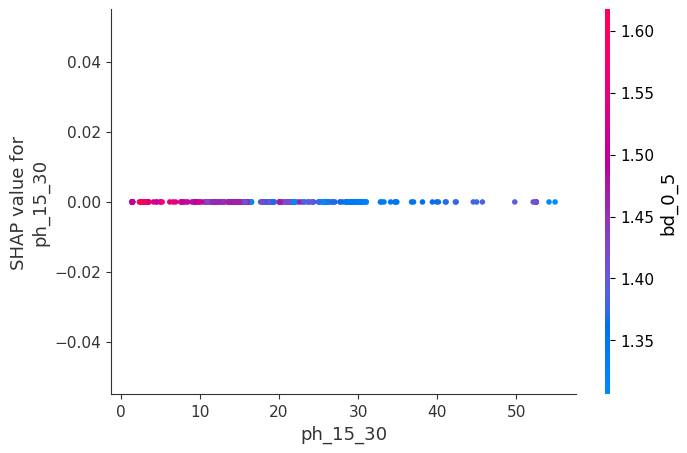

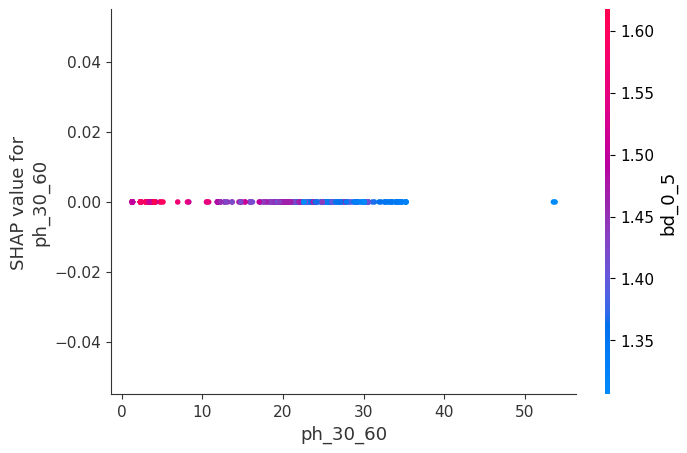

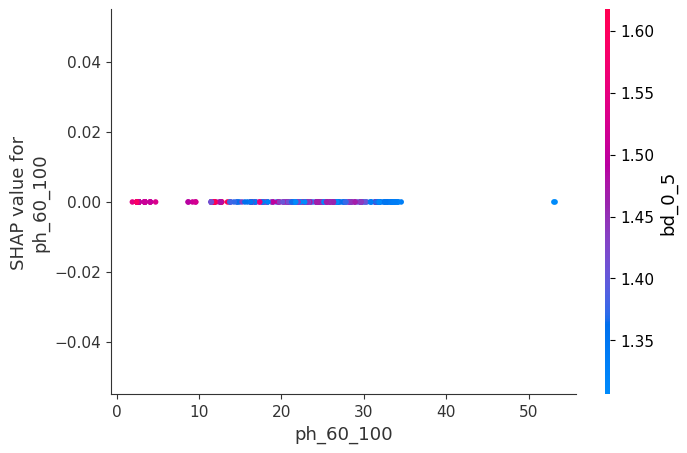

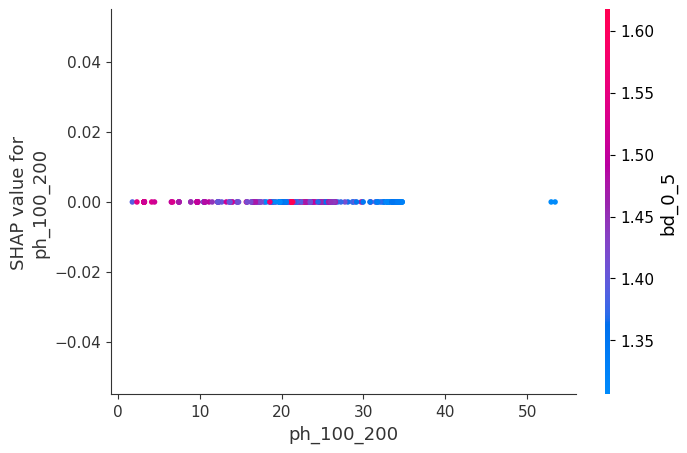

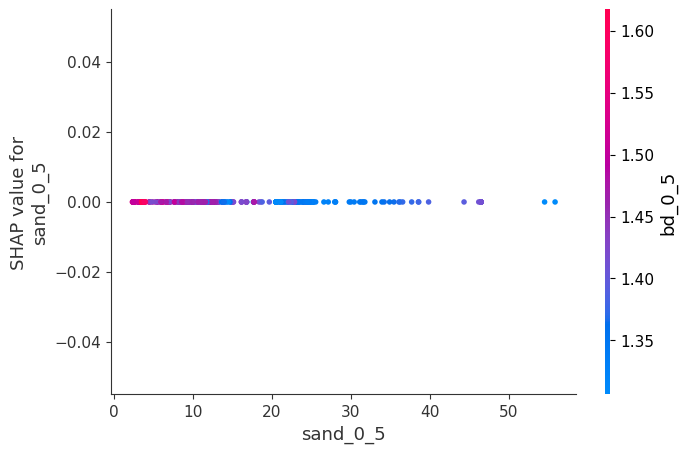

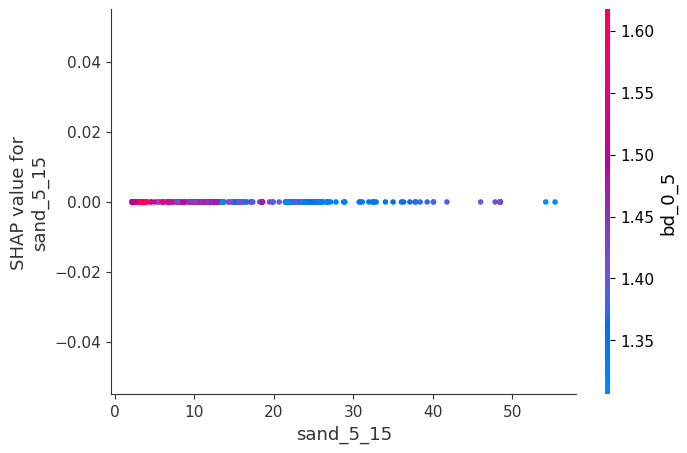

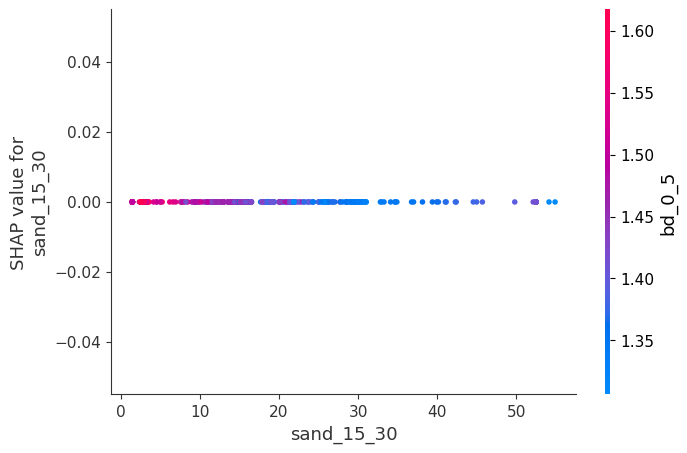

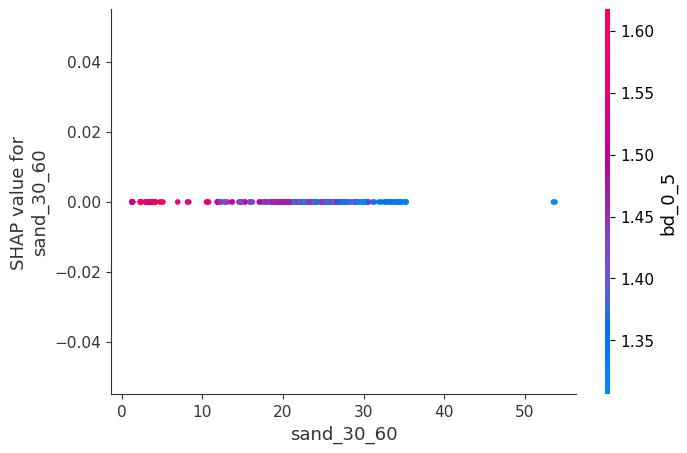

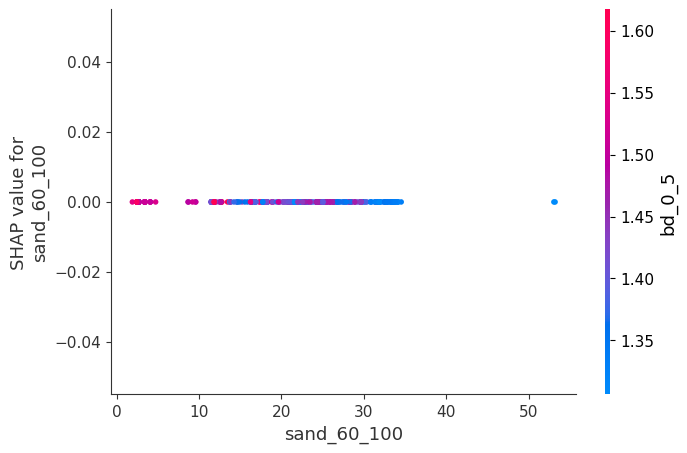

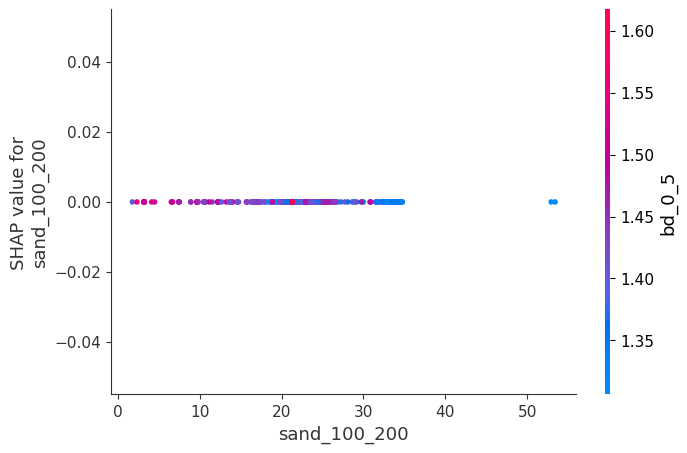

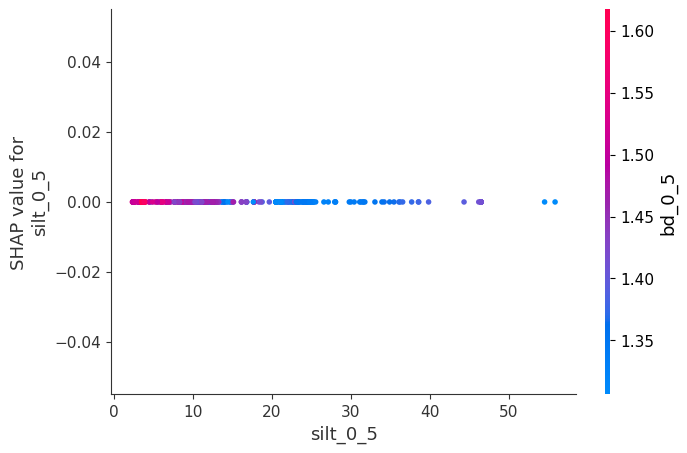

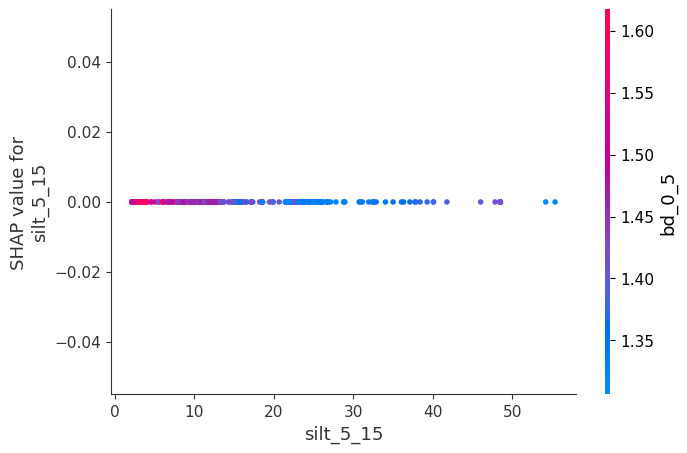

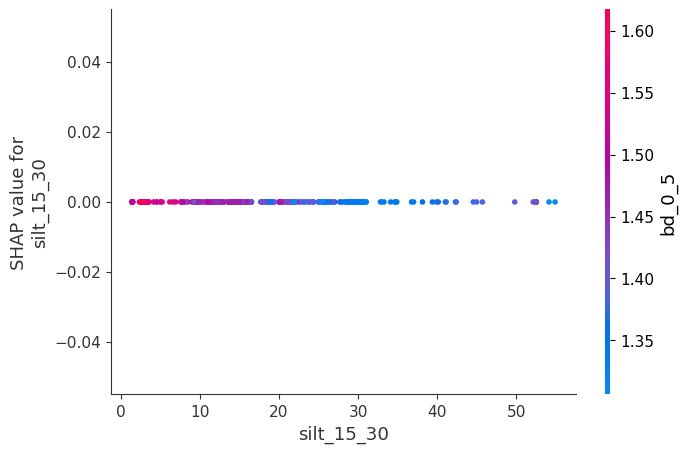

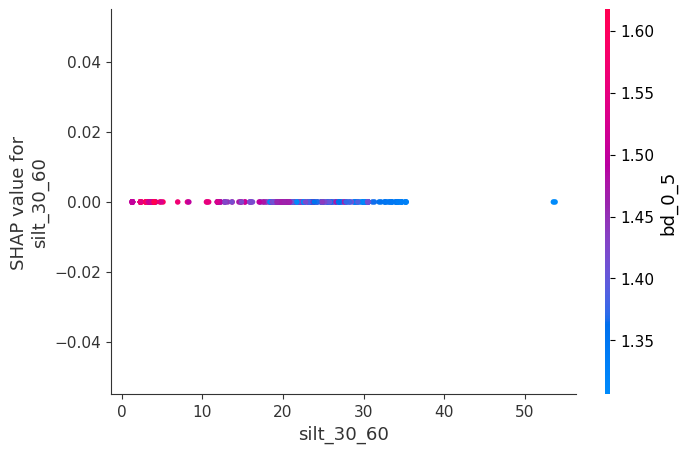

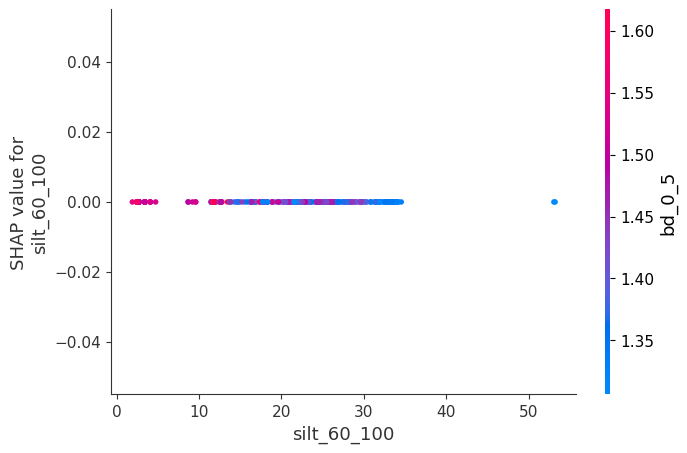

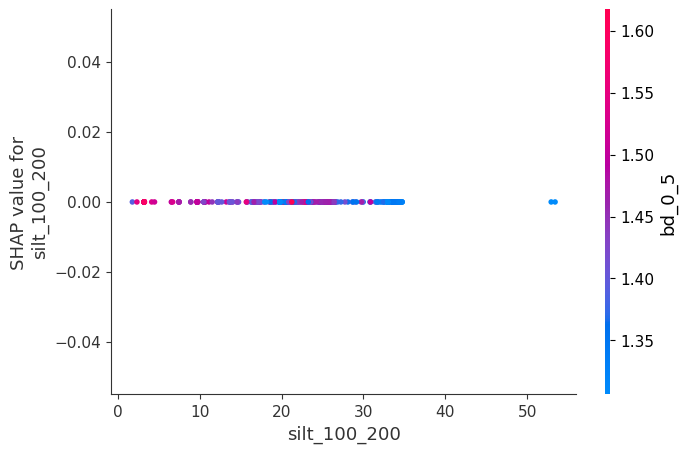

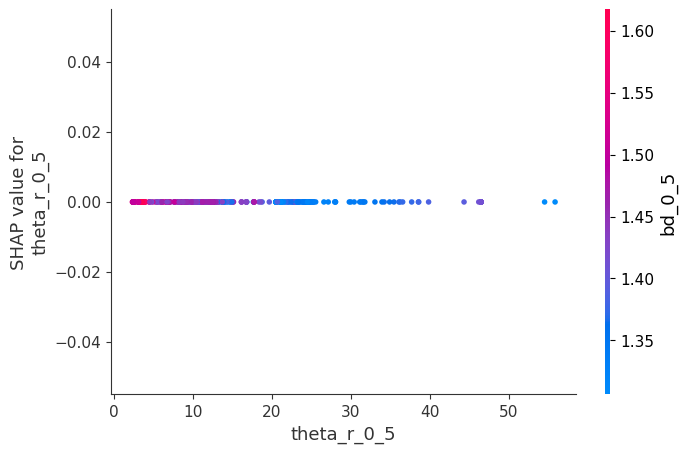

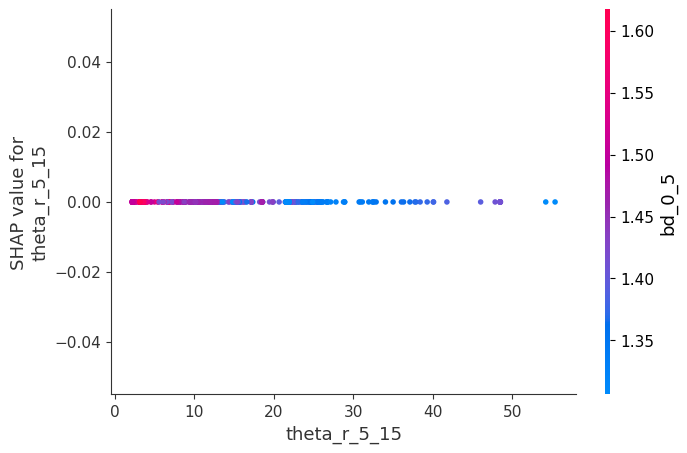

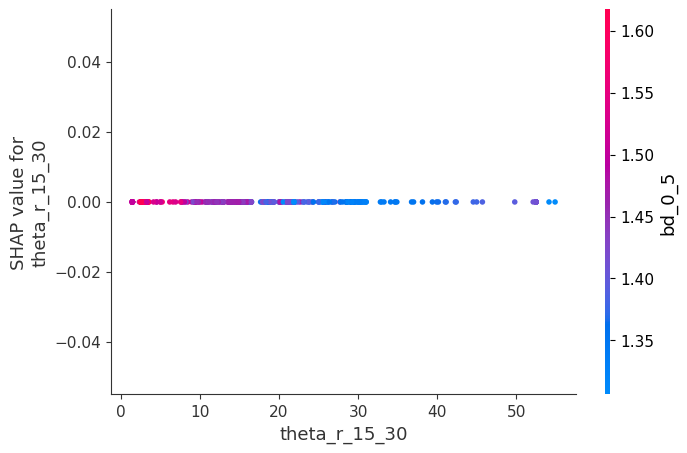

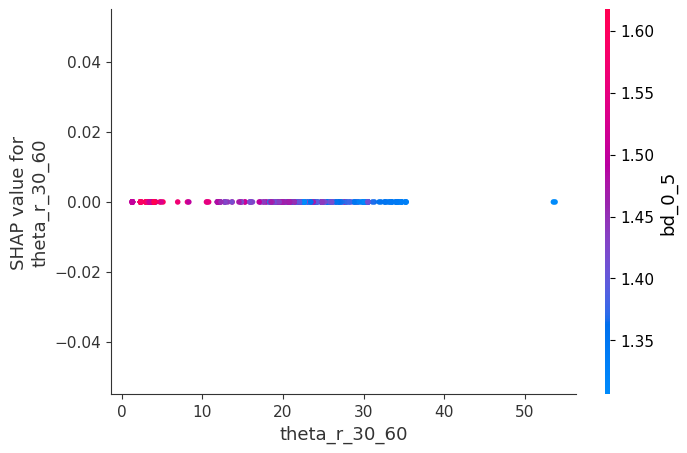

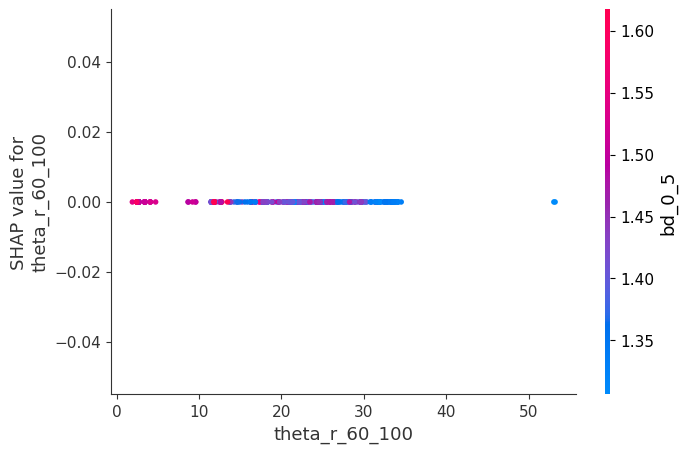

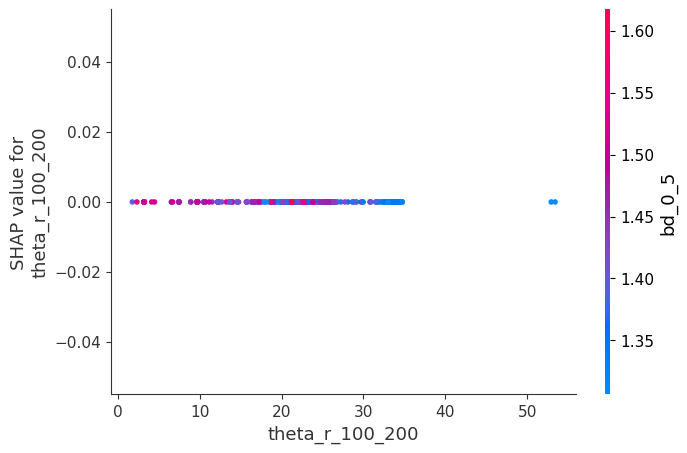

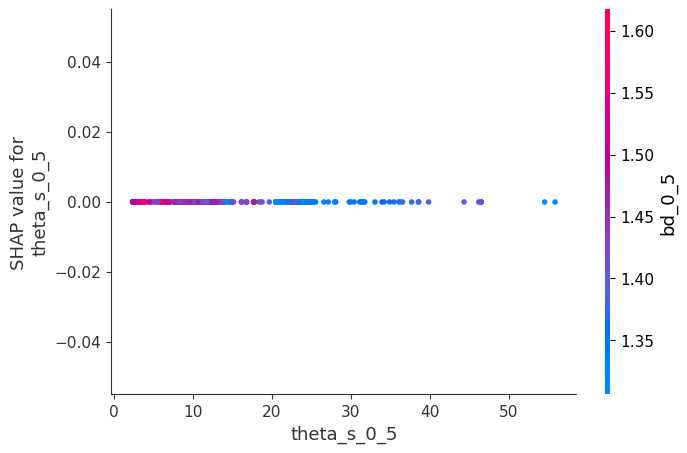

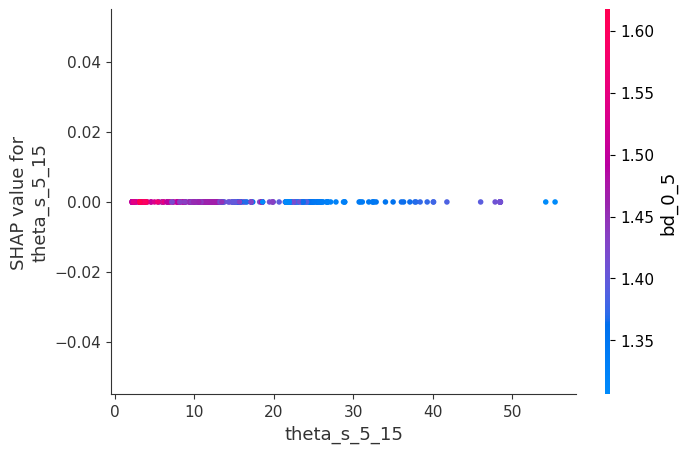

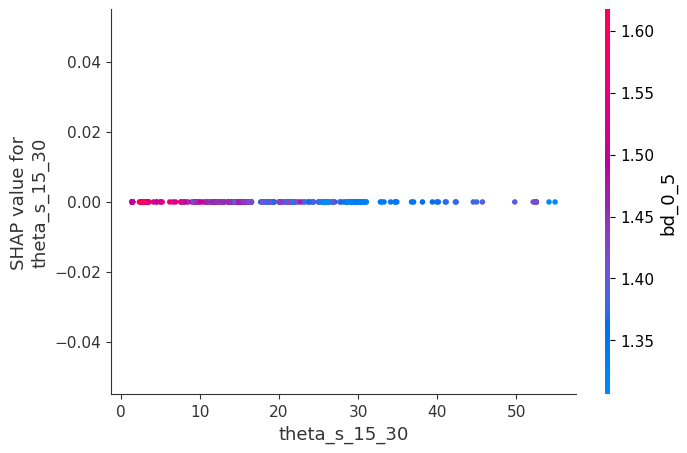

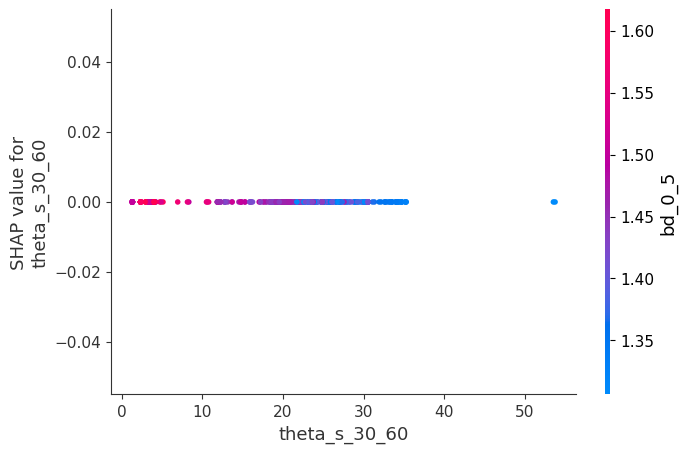

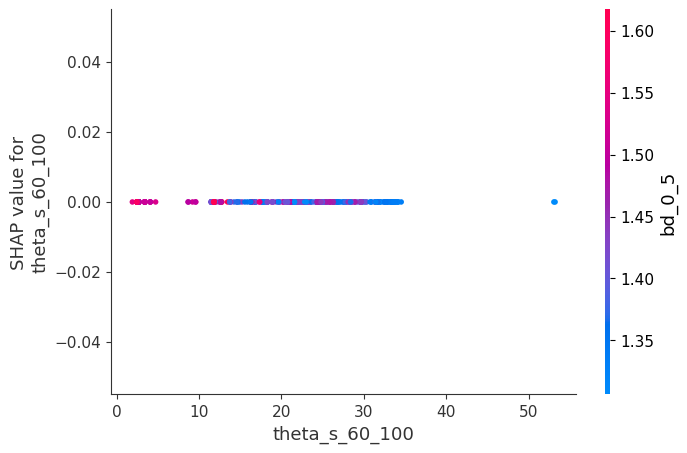

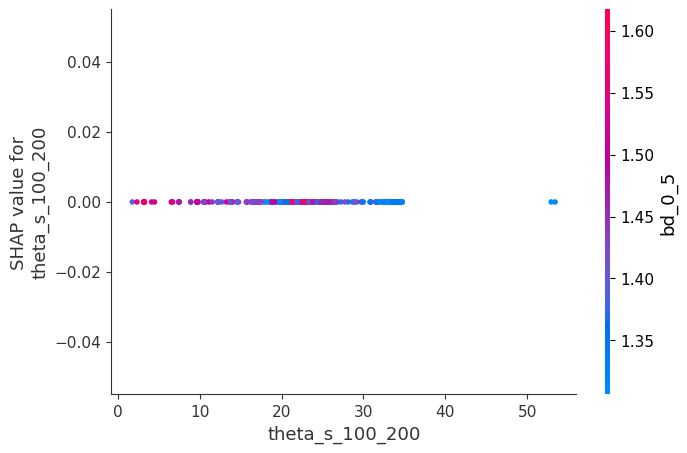

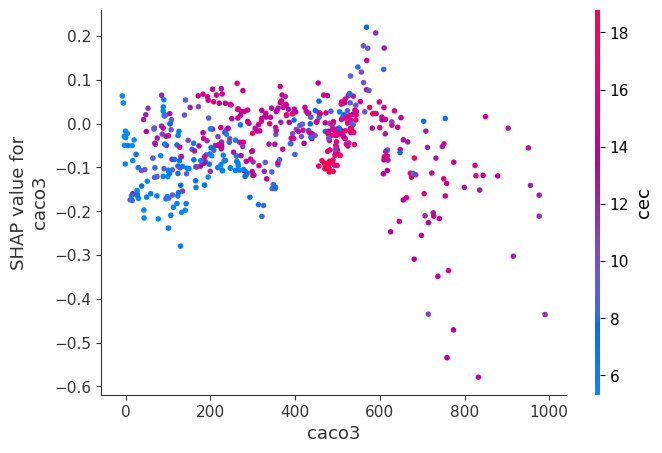

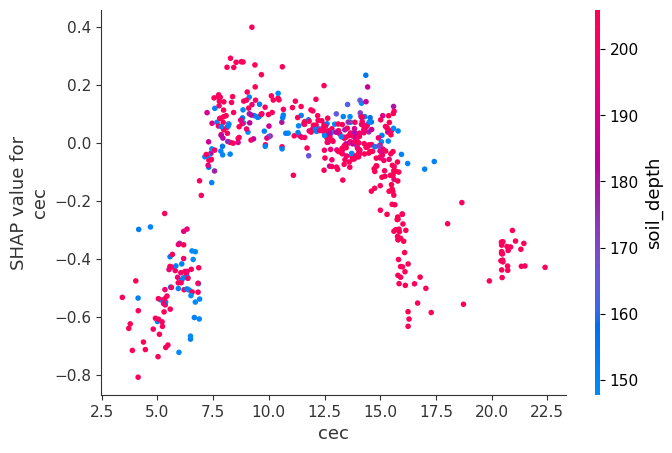

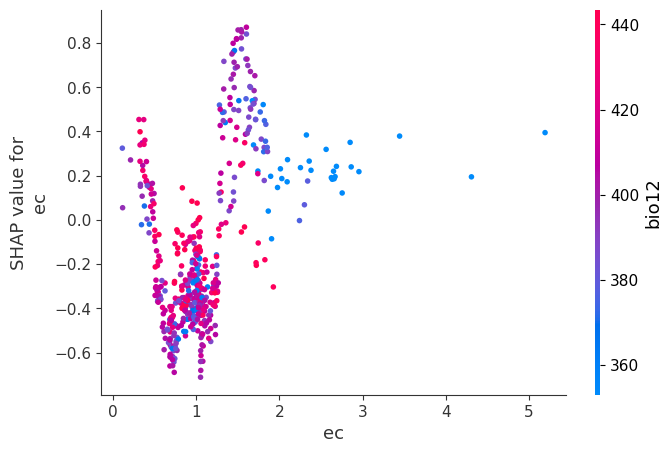

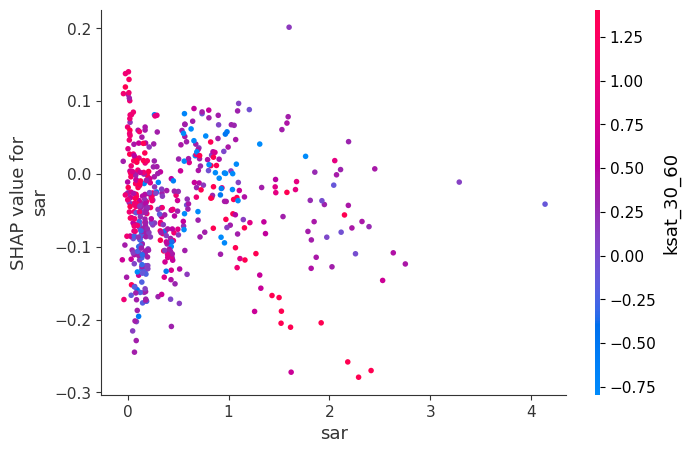

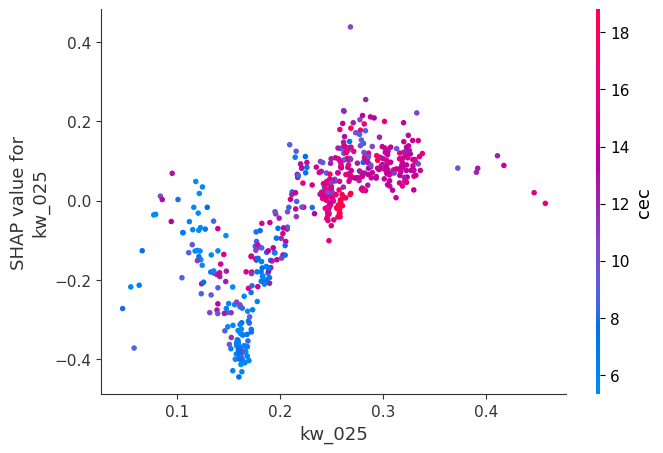

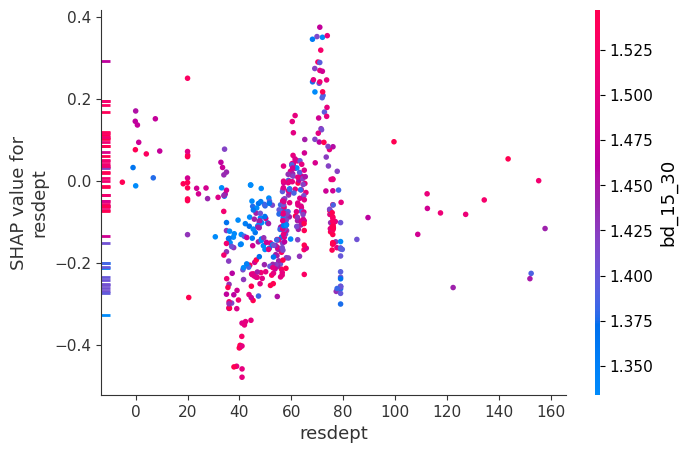

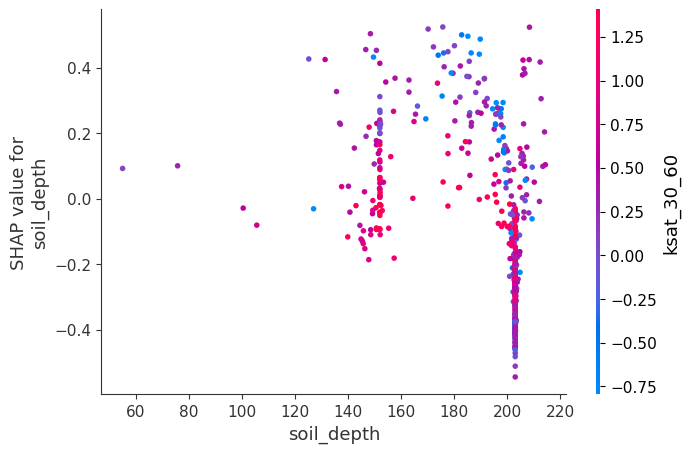

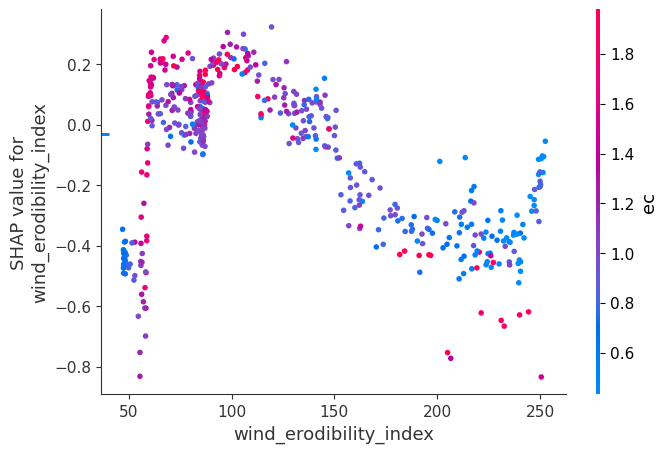

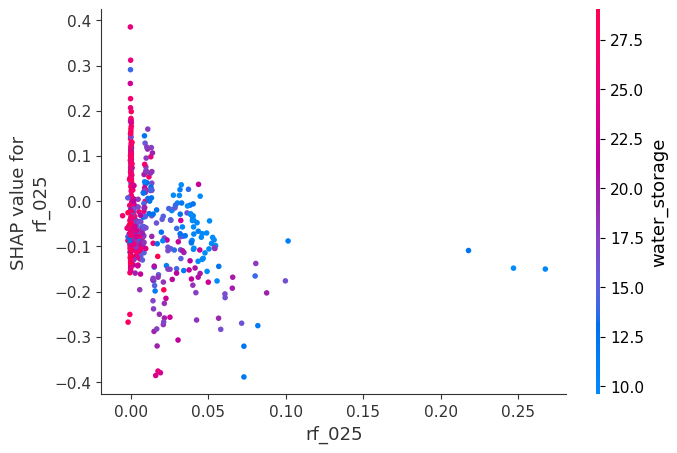

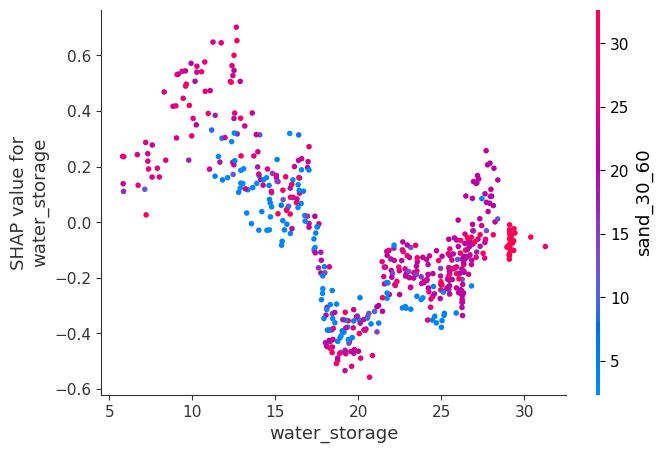

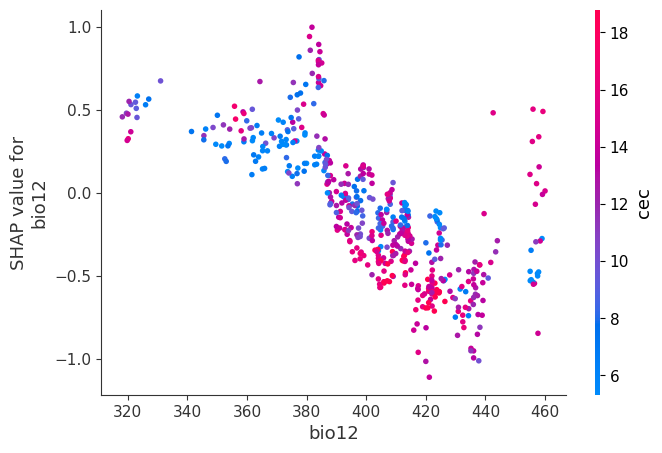

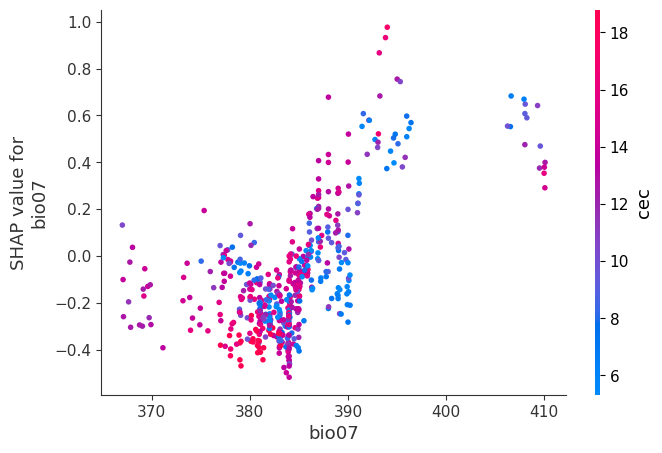

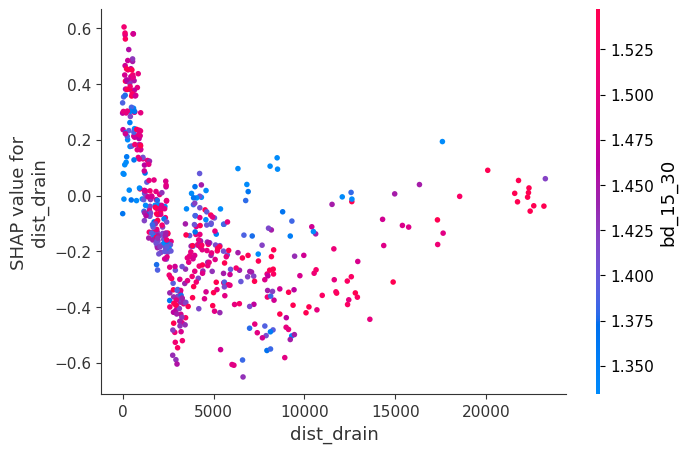

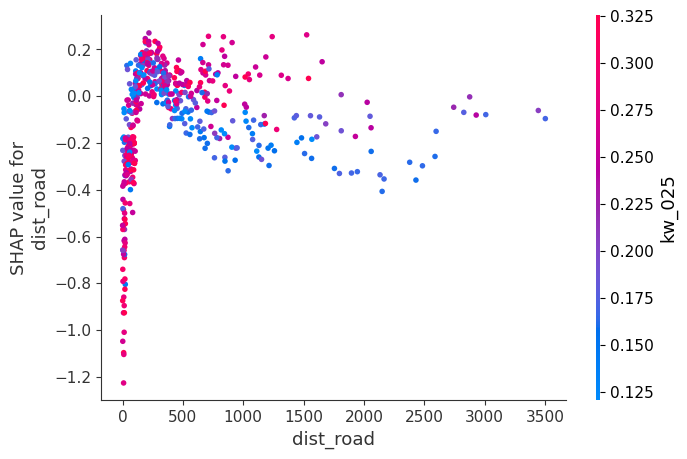

In [104]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_test, display_features=X_test)

In [26]:
explainer.expected_value

0.23583233

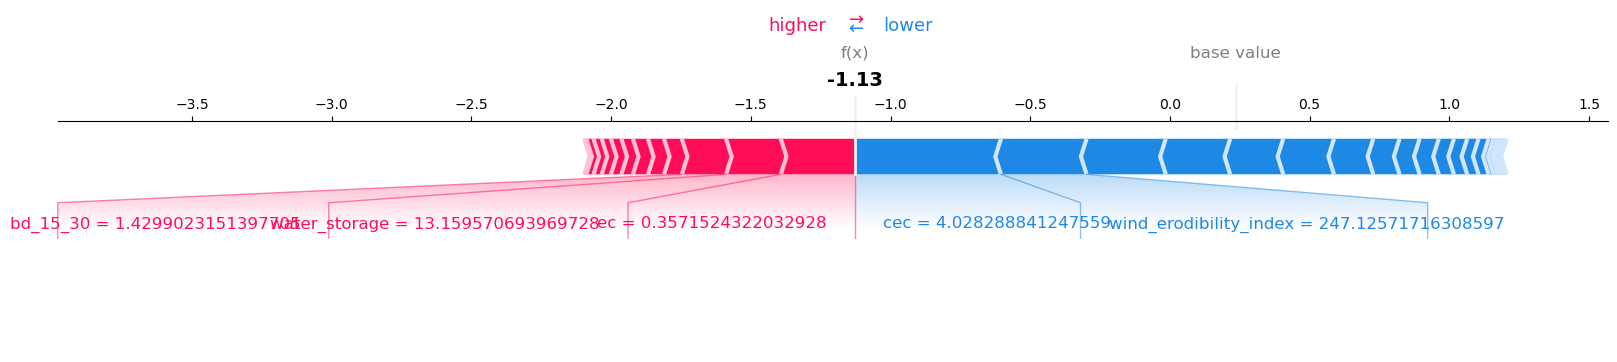

In [61]:
shap.plots.force(explainer.expected_value, shap_values[11,:], X_test.iloc[11, :], matplotlib = True) # can change to represent a row in the testing data

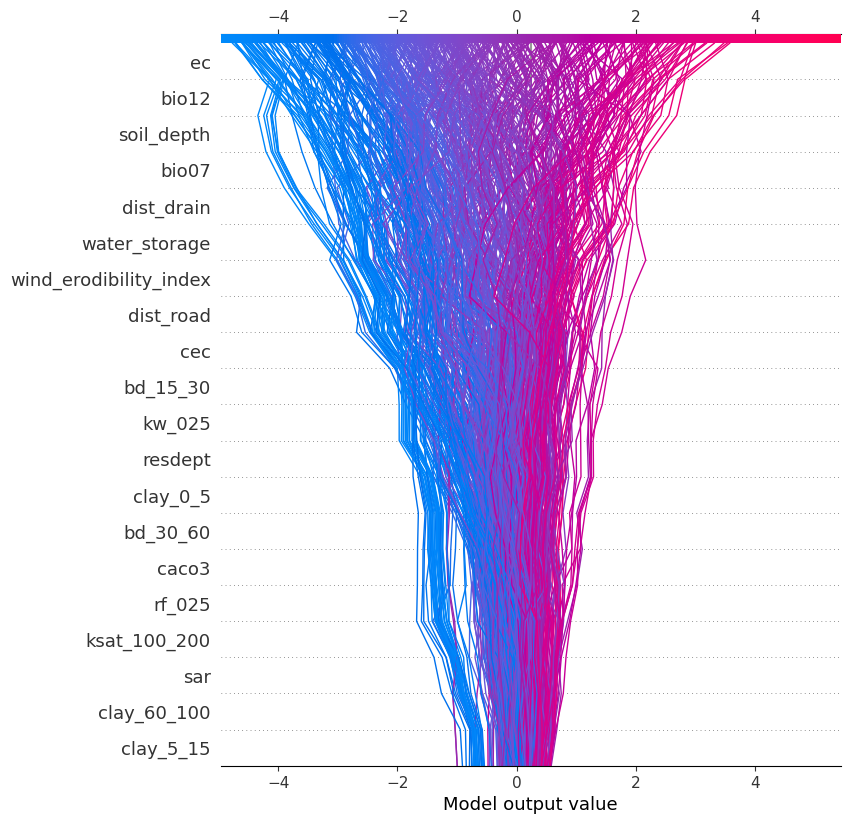

In [25]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns)

# Testing a Random Forests model

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       442
           1       0.40      0.86      0.54        58

    accuracy                           0.83       500
   macro avg       0.69      0.85      0.72       500
weighted avg       0.91      0.83      0.86       500



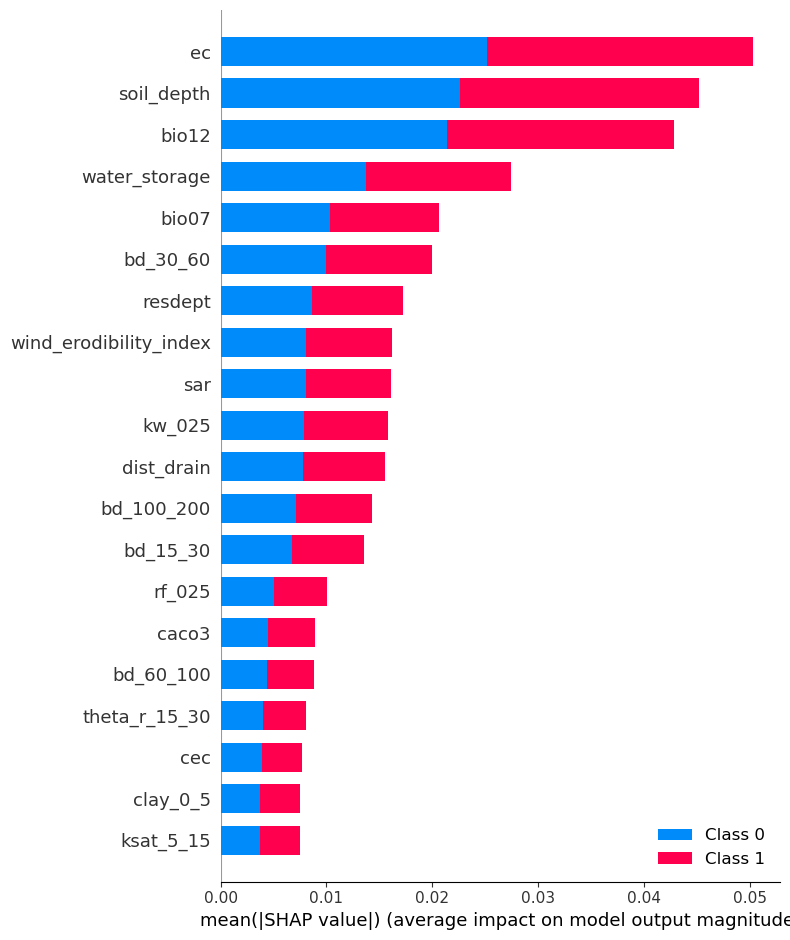

In [28]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

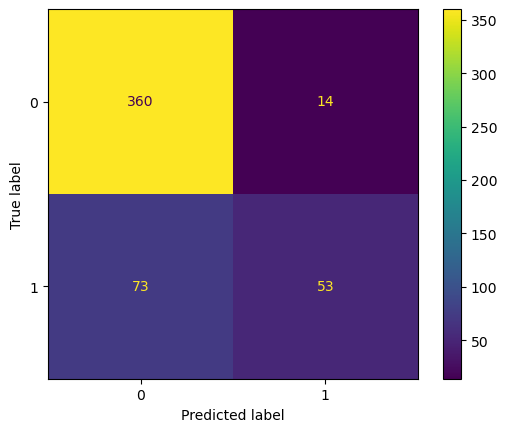

In [23]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)